### Create Latitude and Longitude Combinations

In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination using citypy.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

### Get the City Weather Data

In [9]:
# Dependencies added above in first cell.
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | quatre cocos
Processing Record 2 of Set 1 | kaltasy
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | fortuna
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | bandarbeyla
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | marquette
Processing Record 9 of Set 1 | qarchi gak
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | avera
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | bivolari
Processing Record 19 of Set 1 | xinyang
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | athabasca
Processi

Processing Record 38 of Set 4 | jhansi
Processing Record 39 of Set 4 | barahona
Processing Record 40 of Set 4 | vila velha
Processing Record 41 of Set 4 | harlingen
Processing Record 42 of Set 4 | angoche
Processing Record 43 of Set 4 | mana
Processing Record 44 of Set 4 | mathbaria
Processing Record 45 of Set 4 | tasiilaq
Processing Record 46 of Set 4 | bethel
Processing Record 47 of Set 4 | hualmay
Processing Record 48 of Set 4 | nanortalik
Processing Record 49 of Set 4 | jardim
Processing Record 50 of Set 4 | raiganj
Processing Record 1 of Set 5 | millau
Processing Record 2 of Set 5 | saint-pierre
Processing Record 3 of Set 5 | butaritari
Processing Record 4 of Set 5 | punakha
Processing Record 5 of Set 5 | uyuni
Processing Record 6 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 5 | sattahip
Processing Record 8 of Set 5 | beatrice
Processing Record 9 of Set 5 | esperance
Processing Record 10 of Set 5 | mouzakion
City not found. Skipping...
Processing 

Processing Record 30 of Set 8 | mount gambier
Processing Record 31 of Set 8 | steamboat springs
Processing Record 32 of Set 8 | meyungs
City not found. Skipping...
Processing Record 33 of Set 8 | constitucion
Processing Record 34 of Set 8 | saleaula
City not found. Skipping...
Processing Record 35 of Set 8 | biak
Processing Record 36 of Set 8 | nizhniy odes
Processing Record 37 of Set 8 | samarai
Processing Record 38 of Set 8 | aflu
City not found. Skipping...
Processing Record 39 of Set 8 | shirokiy
Processing Record 40 of Set 8 | toliary
City not found. Skipping...
Processing Record 41 of Set 8 | tabas
Processing Record 42 of Set 8 | okha
Processing Record 43 of Set 8 | tres picos
Processing Record 44 of Set 8 | deputatskiy
Processing Record 45 of Set 8 | walvis bay
Processing Record 46 of Set 8 | magole
Processing Record 47 of Set 8 | shitanjing
Processing Record 48 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 49 of Set 8 | usinsk
Processing Record 50 of Set 8 | 

Processing Record 16 of Set 12 | chake chake
Processing Record 17 of Set 12 | toora-khem
Processing Record 18 of Set 12 | skiros
City not found. Skipping...
Processing Record 19 of Set 12 | misratah
Processing Record 20 of Set 12 | makung
City not found. Skipping...
Processing Record 21 of Set 12 | dosso
Processing Record 22 of Set 12 | ituni
City not found. Skipping...
Processing Record 23 of Set 12 | ondarroa
Processing Record 24 of Set 12 | saint anthony
Processing Record 25 of Set 12 | khani
Processing Record 26 of Set 12 | fairhope
Processing Record 27 of Set 12 | tigre
Processing Record 28 of Set 12 | noumea
Processing Record 29 of Set 12 | warrington
Processing Record 30 of Set 12 | ormara
Processing Record 31 of Set 12 | tombouctou
Processing Record 32 of Set 12 | lufilufi
Processing Record 33 of Set 12 | sibu
Processing Record 34 of Set 12 | paka
Processing Record 35 of Set 12 | tibati
Processing Record 36 of Set 12 | comines
Processing Record 37 of Set 12 | dzierzoniow
Proces

In [12]:
# checking number of cities added to city_data.
len(city_data)

558

### Create a DataFrame of City Weather Data

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Quatre Cocos,-20.21,57.76,75.20,83,75,4.70,MU,2020-02-17 01:22:12
1,Kaltasy,55.97,54.80,8.13,95,98,7.56,RU,2020-02-17 01:22:12
2,Bluff,-46.60,168.33,68.00,77,51,11.01,NZ,2020-02-17 01:22:12
3,Fortuna,40.60,-124.16,53.01,100,90,9.17,US,2020-02-17 01:22:12
4,Barrow,71.29,-156.79,-41.80,82,1,9.17,US,2020-02-17 01:22:12
5,Bandarbeyla,9.49,50.81,75.45,77,56,14.67,SO,2020-02-17 01:22:13
6,Jamestown,42.10,-79.24,32.00,100,1,4.70,US,2020-02-17 01:22:13
7,Marquette,46.53,-87.63,9.00,71,5,4.70,US,2020-02-17 01:21:43
8,Qarchi Gak,37.04,66.79,37.40,51,90,4.70,AF,2020-02-17 01:22:13
9,Airai,-8.93,125.41,76.41,76,36,1.23,TL,2020-02-17 01:17:46


In [14]:
# reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Quatre Cocos,MU,2020-02-17 01:22:12,-20.21,57.76,75.20,83,75,4.70
1,Kaltasy,RU,2020-02-17 01:22:12,55.97,54.80,8.13,95,98,7.56
2,Bluff,NZ,2020-02-17 01:22:12,-46.60,168.33,68.00,77,51,11.01
3,Fortuna,US,2020-02-17 01:22:12,40.60,-124.16,53.01,100,90,9.17
4,Barrow,US,2020-02-17 01:22:12,71.29,-156.79,-41.80,82,1,9.17
5,Bandarbeyla,SO,2020-02-17 01:22:13,9.49,50.81,75.45,77,56,14.67
6,Jamestown,US,2020-02-17 01:22:13,42.10,-79.24,32.00,100,1,4.70
7,Marquette,US,2020-02-17 01:21:43,46.53,-87.63,9.00,71,5,4.70
8,Qarchi Gak,AF,2020-02-17 01:22:13,37.04,66.79,37.40,51,90,4.70
9,Airai,TL,2020-02-17 01:17:46,-8.93,125.41,76.41,76,36,1.23


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Plot Latitude vs. Temperature

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

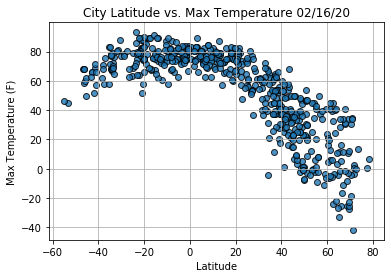

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

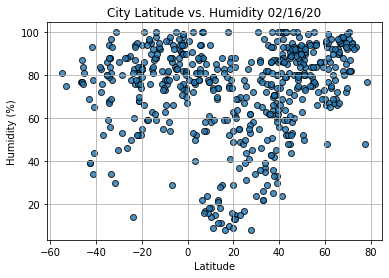

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

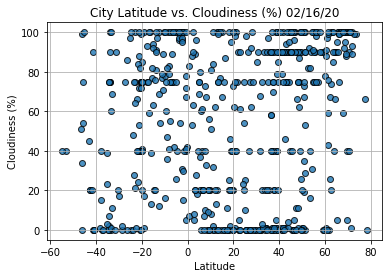

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

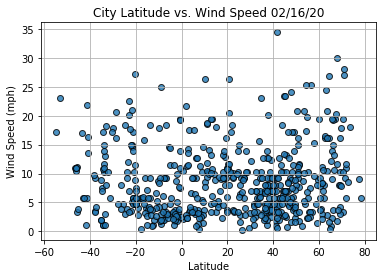

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()